In [ ]:

import itertools
import joblib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
csv_filename = "/content/drive/MyDrive/data_indo (1)fg.csv"
feather_filename = "/content/drive/MyDrive/data_indo (1)fg.feather"

In [ ]:
if not os.path.exists(feather_filename):
    # Baca melalui csv
    df = pd.read_csv("/content/drive/MyDrive/data_indo (1)fg.csv")

    # Ubah ke feather
    df.to_feather("/content/drive/MyDrive/data_indo (1)fg.feather")

In [ ]:
raw_df = pd.read_feather(feather_filename)

In [ ]:
raw_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
0,0.515839,0.815761,147990.0,-70.860718,53.430611,1.060000e+11,7.242132,585.076538,4.359247,12.274838,...,24.886148,24.042124,2.860557,22.876989,35.648666,14.571663,1.500181,3.443842,1.125000e+09,79.082863
1,0.537854,0.876745,161840.0,-76.991524,54.810966,1.170000e+11,6.911983,631.782837,4.195862,7.510941,...,22.921555,24.768486,2.633034,21.243954,37.366966,13.987560,1.563972,2.809320,1.049000e+09,79.442955
2,0.664507,0.910356,170910.0,-73.712494,55.702099,1.280000e+11,6.497507,681.938416,4.227434,7.039650,...,22.826057,24.841057,3.034672,21.288589,36.809334,14.026348,1.584425,2.611230,1.084000e+09,76.161682
3,0.558998,0.971857,185480.0,-63.970974,59.075211,1.580000e+11,6.496408,827.905273,3.525509,5.629365,...,23.193142,24.419376,3.191169,21.547928,37.811424,13.030102,1.565485,2.409692,1.094000e+09,80.224670
4,0.506720,1.015535,196930.0,-74.906761,57.469475,1.770000e+11,7.539971,912.203308,4.147252,4.991235,...,23.168301,25.374971,3.111708,23.304232,35.751064,12.458026,1.659927,3.775459,1.939000e+09,84.343239


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25 non-null     float64
 1   x2      29 non-null     float64
 2   x3      29 non-null     float64
 3   x4      25 non-null     float64
 4   x5      25 non-null     float64
 5   x6      31 non-null     float64
 6   x7      31 non-null     float64
 7   x8      31 non-null     float64
 8   x9      30 non-null     float64
 9   x10     30 non-null     float64
 10  x11     30 non-null     float64
 11  x12     30 non-null     float64
 12  x13     30 non-null     float64
 13  x14     30 non-null     float64
 14  x15     30 non-null     float64
 15  x16     30 non-null     float64
 16  x17     30 non-null     float64
 17  x18     30 non-null     float64
 18  x19     30 non-null     float64
 19  x20     30 non-null     float64
 20  x21     30 non-null     float64
 21  x22     30 non-null     float64
 22  x23 

In [ ]:
data_stat = pd.DataFrame()
data_stat.index = raw_df.columns
data_stat["unique_value"] = raw_df.nunique()
data_stat["missing_rate"] = raw_df.isna().mean()
data_stat["dtype"] = raw_df.dtypes
data_stat

,unique_value,missing_rate,dtype
x1,25,0.193548,float64
x2,29,0.064516,float64
x3,29,0.064516,float64
x4,25,0.193548,float64
x5,25,0.193548,float64
...,...,...,...
x56,25,0.193548,float64
x57,25,0.193548,float64
x58,26,0.161290,float64
x59,26,0.161290,float64


In [ ]:
raw_df['x1'].fillna(raw_df['x1'].mean(),inplace=True)
raw_df['x2'].fillna(raw_df['x2'].mean(),inplace=True)
raw_df['x3'].fillna(raw_df['x3'].mean(),inplace=True)
raw_df['x4'].fillna(raw_df['x4'].mean(),inplace=True)
raw_df['x5'].fillna(raw_df['x5'].mean(),inplace=True)
raw_df['x9'].fillna(raw_df['x9'].mean(),inplace=True)
raw_df['x10'].fillna(raw_df['x10'].mean(),inplace=True)
raw_df['x11'].fillna(raw_df['x11'].mean(),inplace=True)
raw_df['x12'].fillna(raw_df['x12'].mean(),inplace=True)
raw_df['x13'].fillna(raw_df['x13'].mean(),inplace=True)
raw_df['x14'].fillna(raw_df['x14'].mean(),inplace=True)
raw_df['x15'].fillna(raw_df['x15'].mean(),inplace=True)
raw_df['x16'].fillna(raw_df['x16'].mean(),inplace=True)
raw_df['x17'].fillna(raw_df['x17'].mean(),inplace=True)
raw_df['x18'].fillna(raw_df['x18'].mean(),inplace=True)
raw_df['x19'].fillna(raw_df['x19'].mean(),inplace=True)
raw_df['x20'].fillna(raw_df['x20'].mean(),inplace=True)
raw_df['x21'].fillna(raw_df['x21'].mean(),inplace=True)
raw_df['x22'].fillna(raw_df['x22'].mean(),inplace=True)
raw_df['x23'].fillna(raw_df['x23'].mean(),inplace=True)
raw_df['x24'].fillna(raw_df['x24'].mean(),inplace=True)
raw_df['x25'].fillna(raw_df['x25'].mean(),inplace=True)
raw_df['x26'].fillna(raw_df['x26'].mean(),inplace=True)
raw_df['x27'].fillna(raw_df['x27'].mean(),inplace=True)
raw_df['x28'].fillna(raw_df['x28'].mean(),inplace=True)
raw_df['x29'].fillna(raw_df['x29'].mean(),inplace=True)
raw_df['x30'].fillna(raw_df['x30'].mean(),inplace=True)
raw_df['x31'].fillna(raw_df['x31'].mean(),inplace=True)
raw_df['x32'].fillna(raw_df['x32'].mean(),inplace=True)
raw_df['x33'].fillna(raw_df['x33'].mean(),inplace=True)
raw_df['x34'].fillna(raw_df['x34'].mean(),inplace=True)
raw_df['x35'].fillna(raw_df['x35'].mean(),inplace=True)
raw_df['x36'].fillna(raw_df['x36'].mean(),inplace=True)
raw_df['x37'].fillna(raw_df['x37'].mean(),inplace=True)
raw_df['x38'].fillna(raw_df['x38'].mean(),inplace=True)
raw_df['x39'].fillna(raw_df['x39'].mean(),inplace=True)
raw_df['x40'].fillna(raw_df['x40'].mean(),inplace=True)
raw_df['x41'].fillna(raw_df['x41'].mean(),inplace=True)
raw_df['x42'].fillna(raw_df['x42'].mean(),inplace=True)
raw_df['x43'].fillna(raw_df['x43'].mean(),inplace=True)
raw_df['x44'].fillna(raw_df['x44'].mean(),inplace=True)
raw_df['x45'].fillna(raw_df['x45'].mean(),inplace=True)
raw_df['x46'].fillna(raw_df['x46'].mean(),inplace=True)
raw_df['x47'].fillna(raw_df['x47'].mean(),inplace=True)
raw_df['x48'].fillna(raw_df['x48'].mean(),inplace=True)
raw_df['x50'].fillna(raw_df['x50'].mean(),inplace=True)
raw_df['x51'].fillna(raw_df['x51'].mean(),inplace=True)
raw_df['x52'].fillna(raw_df['x52'].mean(),inplace=True)
raw_df['x53'].fillna(raw_df['x53'].mean(),inplace=True)
raw_df['x54'].fillna(raw_df['x54'].mean(),inplace=True)
raw_df['x55'].fillna(raw_df['x55'].mean(),inplace=True)
raw_df['x56'].fillna(raw_df['x56'].mean(),inplace=True)
raw_df['x57'].fillna(raw_df['x57'].mean(),inplace=True)
raw_df['x58'].fillna(raw_df['x58'].mean(),inplace=True)
raw_df['x59'].fillna(raw_df['x59'].mean(),inplace=True)
raw_df['x60'].fillna(raw_df['x60'].mean(),inplace=True)
raw_df['y'].fillna(raw_df['y'].mean(),inplace=True)

In [ ]:
raw_df.isna().mean().sort_values(ascending=False)

x1     0.0
x32    0.0
x34    0.0
x35    0.0
x36    0.0
      ... 
x26    0.0
x27    0.0
x28    0.0
x29    0.0
x60    0.0
Length: 61, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(raw_df,raw_df['y'],test_size=0.2,random_state=32)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=32)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler = MinMaxScaler()
scaler.fit(x_test)
x_test = scaler.transform(x_test)

scaler = MinMaxScaler()
scaler.fit(x_val)
x_val = scaler.transform(x_val)




scaler = MinMaxScaler()
scaler.fit_transform(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit_transform(y_test.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit_transform(y_val.values.reshape(-1,1))
y_val = scaler.transform(y_val.values.reshape(-1,1))

In [ ]:

from keras import Sequential
from keras.layers import Dense, Dropout
neurons = 150
model = Sequential()
model.add(Dense(neurons,input_dim = 61,activation="tanh"))
model.add(Dense(150,input_dim = 61,activation="tanh"))
model.add(Dense(1))

model.compile(optimizer='SGD', loss="mean_squared_error", metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=100,shuffle=False)

Epoch 1/100
1/1 [==============================] - 0s 493ms/step - loss: 0.4168 - mean_absolute_error: 0.5217 - val_loss: 0.1867 - val_mean_absolute_error: 0.3514
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0984 - mean_absolute_error: 0.2740 - val_loss: 0.1930 - val_mean_absolute_error: 0.3346
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0818 - mean_absolute_error: 0.2436 - val_loss: 0.1830 - val_mean_absolute_error: 0.3183
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0704 - mean_absolute_error: 0.2237 - val_loss: 0.1761 - val_mean_absolute_error: 0.3051
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0618 - mean_absolute_error: 0.2095 - val_loss: 0.1706 - val_mean_absolute_error: 0.2942
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0554 - mean_absolute_error: 0.1977 - val_loss: 0.1662 - val_mean_absolute_error: 0.2853
Epoch 7/100
1/1 [==========

In [ ]:
result = model.evaluate(x_test,y_test)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

1/1 [==============================] - 0s 20ms/step - loss: 0.0244 - mean_absolute_error: 0.1299
Metric  loss : 0.02
Metric  mean_absolute_error : 0.13


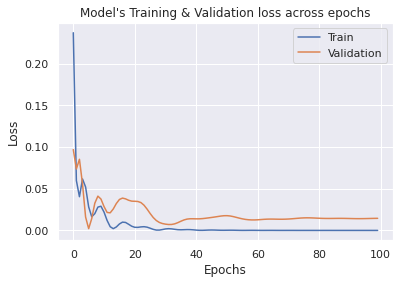

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()